# Graphite Analysis

In [223]:
import numpy as np
import matplotlib.pyplot as plt
from uncertainties import ufloat
from uncertainties.umath import *
from uncertainties import unumpy as unp
from scipy import stats

In [224]:
voltage = [3.98, 5.02, 6.02, 7.025, 8.09] #(kV)

v_uncertainty = [0.01, 0.02, 0.02, 0.025, 0.03]

inner_d = [0.03230, 0.02854, 0.02561, 0.02391, 0.02224] #inner (1st) ring diameter (m)

outter_d = [0.05505, 0.04921, 0.04459, 0.04092, 0.03878] #outter (2nd) ring diameter(m)

inner_uncertainty = [0.00160, 0.00140, 0.00085, 0.00115, 0.00070]

outter_uncertainty = [0.00090, 0.00195, 0.00090, 0.00080, 0.00075]

#### Python uncertainties package uses the below eqation to calculate the uncertainty for $ f = aA^b $ or in our case $ \frac{1}{\sqrt{v}} $
$$ \sigma_f = abA^{b-1}\sigma_A $$
#### this comes from the general formula (which is the same way the rest of the propagated errors will be calculated) : 
$$ \sigma_f^2 = \sigma_x^2 \Big( \frac{\partial f}{\partial x} \Big) + \sigma_y^2 \Big( \frac{\partial f}{\partial y} \Big) + \sigma_z^2 \Big( \frac{\partial f}{\partial z} \Big) + ...$$

#### Propagating through:

In [225]:
inv_sqrt_v = []  #1/sqrt(voltage) +/- uncertainty 
for i in range(len(voltage)):
    x = ufloat(voltage[i], v_uncertainty[i])
    inv_sqrt_v.append(1/sqrt(x))  
print("\n The values for 1/sqrt(V) are: \n" + str(inv_sqrt_v))

new_sigmav = [0.0006297169687400572, 0.0008890873360108602, 0.0006770258687202846, 0.0006713369020503069, 0.0006518812304709178]


 The values for 1/sqrt(V) are: 
[0.5012547071170855+/-0.0006297169687400572, 0.4463218426774518+/-0.0008890873360108602, 0.4075695729696112+/-0.0006770258687202846, 0.37729133895227246+/-0.0006713369020503069, 0.351581276967315+/-0.0006518812304709178]



#### Equation to solve for theta (refer to image, "solving for Theta" for how we got to this): 

$$ \theta = \frac{1}{2} tan^{-1}\Big(\frac{D}{2L}\Big) $$

In [226]:
L = 18.06 * 10**(-2) #(m) given in write-up

inner_theta = []
for i in range(len(inner_d)):
    x = ufloat(inner_d[i], inner_uncertainty[i])
    inner_theta.append(1/2 * atan(x/(2*L)))
print("\n The Values for inner Theta are: \n"
       + str(inner_theta))

outter_theta = []
for i in range(len(outter_d)):
    x = ufloat(outter_d[i], outter_uncertainty[i])
    outter_theta.append(1/2 * atan(x/(2*L)))
print("\n The Values for outter Theta are: \n"
       + str(outter_theta))


 The Values for inner Theta are: 
[0.04459345680309149+/-0.002197268576770531, 0.03942528674842345+/-0.0019259601972674409, 0.03539204553964391+/-0.0011707478940031137, 0.03304978916592978+/-0.0015849706339832398, 0.030747450855999305+/-0.0009653325015031149]

 The Values for outter Theta are: 
[0.07562237363006792+/-0.0012175650956582447, 0.06770331854680865+/-0.002650145086620211, 0.061414084454383656+/-0.0012271457125027068, 0.05640403454194557+/-0.0010933867429145908, 0.05347731888087806+/-0.001026374852719187]


#### Bragg's Equation 
$$ sin(\theta_{hkl}) = \sqrt{h^2+hk+k^2} \Big(\frac{\lambda}{\sqrt{3}a}\Big)$$
#### Solving for $\lambda$ :
$$\large \lambda =  \frac{\sqrt{3}a*sin(\theta_{hkl})}{\sqrt{h^2+hk+k^2}} $$

In [259]:
a = .246 * 10**-9  #(m) given in write-up
h1 = 1 ; k1 = 0 #first set of miller indicies
h2 = 1 ; k2 = 1 #second set of miller indicies

miller_wavelength_inner = []
for i in range(len(inner_theta)):
        miller_wavelength_inner.append(sqrt(3) * a * sin(inner_theta[i]) / sqrt(h2**2 + h2 * k2 + k2^2))
print("\n The wavelenth calculated for each point (V,D) for the inner ring are: \n" + str(miller_wavelength_inner))

miller_wavelength_outter = []
for i in range(len(outter_theta)):
        miller_wavelength_outter.append(sqrt(3) * a * sin(outter_theta[i]) / sqrt(h1**2 + h1 * k1 + k1^2))
print("\n The wavelenth calculated for each point (V,D) for the outter ring are: \n" + str(miller_wavelength_outter))


 The wavelenth calculated for each point (V,D) for the inner ring are: 
[1.8994283960633336e-11+/-9.352913596464506e-13, 1.6794152075617698e-11+/-8.199840996377459e-13, 1.5076853983620907e-11+/-4.985251409175738e-13, 1.4079439385876225e-11+/-6.749626231533304e-13, 1.3098947985348693e-11+/-4.1111880132643605e-13]

 The wavelenth calculated for each point (V,D) for the outter ring are: 
[1.8585377919343048e-11+/-2.986649796930918e-13, 1.664229556934718e-11+/-6.504421103164124e-13, 1.5098369536774764e-11+/-3.0130872939646983e-13, 1.3868036436986133e-11+/-2.6854539457341783e-13, 1.3149150977523009e-11+/-2.5212726392168885e-13]


#### De Broglie's Relation Eq. (1)
$$ \lambda = \frac{h}{p} = \frac{h}{\sqrt{2mE}} $$
#### Energy Relation Eq. (2)
$$ eV = \frac{p^2}{2m} = E $$
#### Combining (1) and (2)
$$ \lambda = \frac{h}{\sqrt{2m(eV)}} * \frac{c}{c}$$

In [251]:
e_restmass = 510.99906  # (keV)
hc = 1.2398              # (keV*nm)
e = 1.602176 * 10 **-19      # (C)

wavelength = []
for i in range(len(voltage)):
    x = ufloat(voltage[i], v_uncertainty[i])
    wavelength.append((hc / sqrt(2*e_restmass*x)) * 10**(-9))
for i in range(len(voltage)):    
    print('Wave length values at ' + str(voltage[i]) + ' keV is: ' + str(wavelength[i]) + ' m')

Wave length values at 3.98 keV is: (1.9439+/-0.0024)e-11 m
Wave length values at 5.02 keV is: (1.7309+/-0.0034)e-11 m
Wave length values at 6.02 keV is: (1.5806+/-0.0026)e-11 m
Wave length values at 7.025 keV is: (1.4632+/-0.0026)e-11 m
Wave length values at 8.09 keV is: (1.3635+/-0.0025)e-11 m


The slopes for fit1, fit2, fit3 are as follows: 1.2263843041248635e-09, 1.2507781655555764e-09, 1.1731412717732867e-09


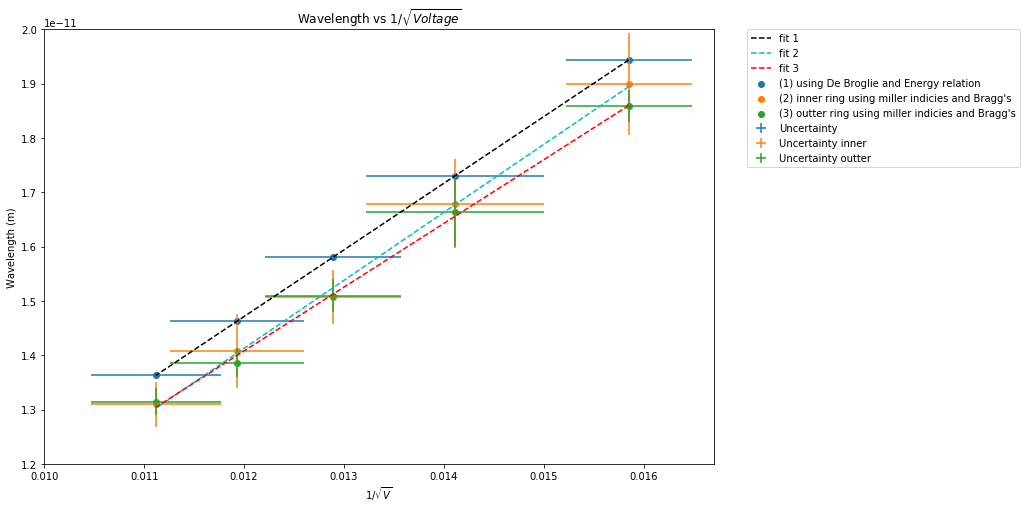

In [261]:
plt.figure(figsize=(12,8))

#plot for De Broglie and Energy relation (wavelength vs Voltage)
plt.scatter(1/np.sqrt(np.multiply(voltage,10**3)), unp.nominal_values(wavelength),
            label = '(1) using De Broglie and Energy relation')
plt.errorbar(1/np.sqrt(np.multiply(voltage,10**3)), unp.nominal_values(wavelength), 
             xerr= new_sigmav, yerr = unp.std_devs(wavelength), marker = 'None',
             fmt = 'o', label = 'Uncertainty')
#fitting to above 
fit1 = np.polyfit(1/np.sqrt(np.multiply(voltage,10**3)), unp.nominal_values(wavelength), 1)
f1 = np.poly1d(fit1)
plt.plot(1/np.sqrt(np.multiply(voltage,10**3)) , f1(1/np.sqrt(np.multiply(voltage,10**3))), '--k', label = 'fit 1')
m1, b1, r_value1, p_value1, std_err1 = stats.linregress(1/np.sqrt(np.multiply(voltage,10**3)), unp.nominal_values(wavelength))

#plot for miller indicies and Bragg's equation (wavelength vs Voltage)
plt.scatter(1/np.sqrt(np.multiply(voltage,10**3)), unp.nominal_values(miller_wavelength_inner),
            label = '(2) inner ring using miller indicies and Bragg\'s')
plt.errorbar(1/np.sqrt(np.multiply(voltage,10**3)), unp.nominal_values(miller_wavelength_inner), 
             xerr= new_sigmav, yerr= unp.std_devs(miller_wavelength_inner), marker = 'None',
             fmt = 'o', label = 'Uncertainty inner')
#fitting to above
fit2 = np.polyfit(1/np.sqrt(np.multiply(voltage,10**3)), unp.nominal_values(miller_wavelength_inner), 1)
f2 = np.poly1d(fit2)
plt.plot(1/np.sqrt(np.multiply(voltage,10**3)) , f2(1/np.sqrt(np.multiply(voltage,10**3))), '--c', label = 'fit 2')
m2, b2, r_value2, p_value2, std_err2 = stats.linregress(1/np.sqrt(np.multiply(voltage,10**3)), unp.nominal_values(miller_wavelength_inner))


#plot for miller indicies and Bragg's equation (wavelength vs Voltage)
plt.scatter(1/np.sqrt(np.multiply(voltage,10**3)), unp.nominal_values(miller_wavelength_outter), 
            label = '(3) outter ring using miller indicies and Bragg\'s')
plt.errorbar(1/np.sqrt(np.multiply(voltage,10**3)), unp.nominal_values(miller_wavelength_outter), 
             xerr= new_sigmav, yerr= unp.std_devs(miller_wavelength_outter), marker = 'None',
             fmt = 'o', label = 'Uncertainty outter')
#fitting to above
fit3 = np.polyfit(1/np.sqrt(np.multiply(voltage,10**3)), unp.nominal_values(miller_wavelength_outter), 1)
f3 = np.poly1d(fit3)
plt.plot(1/np.sqrt(np.multiply(voltage,10**3)) , f3(1/np.sqrt(np.multiply(voltage,10**3))), '--r', label = 'fit 3')
m3, b3, r_value2, p_value3, std_err3 = stats.linregress(1/np.sqrt(np.multiply(voltage,10**3)), unp.nominal_values(miller_wavelength_outter))

print("The slopes for fit1, fit2, fit3 are as follows: " + str(m1)+ ", " + str(m2)+ ", " + str(m3))

plt.xlim(0.01, 0.0167)
plt.ylim(1.2*10**-11, 2*10**-11)
plt.xlabel('$1/\sqrt{V}$')
plt.ylabel('Wavelength (m)')
plt.title('Wavelength vs $1/\sqrt{Voltage}$')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show();

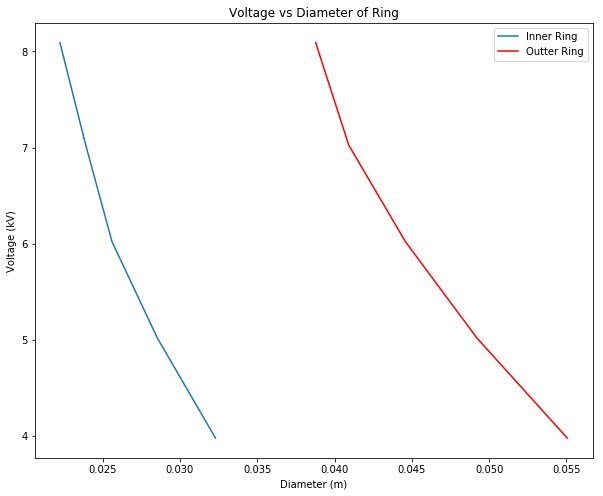

In [230]:
#just to show the difference this is the Voltage vs Diameter for the inner ring vs outter
plt.figure(figsize=(10,8))
plt.plot(inner_d, voltage, label = 'Inner Ring')
plt.plot(outter_d, voltage, color = 'r', label = 'Outter Ring')
plt.xlabel('Diameter (m)')
plt.ylabel('Voltage (kV)')
plt.title('Voltage vs Diameter of Ring');

plt.legend();

-------------------------

# Aluminum Analysis